# Midterm Project: Finding Neutrino Oscillation Parameters

## Introduction

Neutrinos, small subatomic particles, only interact through the weak force and gravity, which makes their detection challenging. Their unique characteristics include lack of electric charge, small mass and the phenomenon of neutrino oscillations. Large detectors are built to detect neutrinos, because they rarely interact with matter, which make them an interesting subject for in\-depth exploration within the area of particle physics. This project aims to measure neutrino oscillation parameters which arise due to the mismatch between neutrino flavour and mass eigenstates.

In a simplified two\-neutrino flavor scenario \($\nu_{\mu}$, $\nu_{\tau}$\), the muon neutrino survival probability is given by:

$P(\nu_{\mu}\rightarrow\nu_{\mu}) = 1 - \sin^{2}(2\theta)\sin^{2}(1.27\Delta m^{2}[eV^{2}]\frac{L [km]}{E[GeV]})$

where:

- $L$ is the distance traveled by neutrinos in kilometers,
- $E$ is the energy of the neutrinos in GeV,
- $\Delta m^{2} = m_{2}^{2} - m_{1}^{2}$ is the mass squared difference between the neutrino mass eigenstates,
- $\theta$ is the quantum mechanical mixing angle.

The analysis aims to determine the shape of the neutrino beam, predict the far detector spectrum for different neutrino oscillation parameters, and fit the far detector neutrino spectrum to find the best\-fit oscillation parameters. It will be conducted by analyzing the given dataset, which represents the correlation between the amount of detected neutrinos at certain distances compared to the neutrino energy through using Python.



## Methods

In this research, the 3 libraries were used to analyse the data: NumPy, Matplotlib, and SciPy. 

1. **NumPy**  It is employed for numerical computations, array manipulations, and mathematical operations. In particular, NumPy is utilized to create arrays for distances $ Ls $, simulate data, and perform mathematical calculations related to neutrino oscillation probabilities.
2. **Matplotlib** is used to generate various plots and visualizations. In the report, it is employed to plot the neutrino oscillation survival probability as a function of distance \($ L $\), visualize the observed number of neutrino events in the near detector, and display the results of Gaussian fitting.
3. **SciPy** is used for scientific and technical computing in Python.The library contributes to the optimization and statistical analysis aspects of the data analysis. In this report, the 'curve\_fit' function was used for nonlinear curve fitting to optimize parameters and obtain the best fit. 

### 1. Determine the Shape of the Neutrino Beam

To visualize neutrino oscillation probabilities, the muon neutrino survival probability function  $P_{\nu_{\mu}\rightarrow\nu_{\mu}}$  \(P\_numu\_numu\) is calculated for distances $L$ between 0 and 1000 km. The parameters used are  $\Delta m^{2} = 2.2 \times 10^{-3} \, \text{eV}^{2} $ and  $\sin^{2}(2\theta) = 0.98$. The result of the probability function is assigned to the variable Ps.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Function for neutrino survival probability
def P_numu_numu(L, E, deltam2, sin22theta):
    return 1 - sin22theta * np.sin(1.27 * deltam2 * L / E)**2

E = 2 # Energy is given as 2GeV
deltam2 = 2.2e-3
sin22theta = 0.98
Ls = np.arange(0, 1000)
Ps = P_numu_numu(Ls, E, deltam2, sin22theta)

The data describing the observed number of neutrino events in each energy bin in the near detector is given in the code below, where bin\_edges and bin\_centers represent the energy levels and counts represents the number of detected neutrinos.  It is employed in plotting histograms to understand the distribution and characteristics of the neutrino beam in terms of energy. 



In [2]:
bin_edges = np.array([0.875,0.975,1.075,1.175,1.275,1.375,1.475,1.575,1.675,1.775,1.875,1.975,2.075,2.175,2.275,2.375,2.475,2.575,2.675,2.775,2.875,2.975,3.075])
bin_centers = np.array([0.925,1.025,1.125,1.225,1.325,1.425,1.525,1.625,1.725,1.825,1.925,2.025,2.125,2.225,2.325,2.425,2.525,2.625,2.725,2.825,2.925,3.025])
counts = np.array([3,2,7,13,21,41,44,66,82,93,88,106,105,93,67,54,26,39,24,10,5,7])

Additionally, the dataset is used for Gaussian fitting to obtain parameters describing the shape of the neutrino beam. It is given by:

$ f(E) = p_{0} \exp\left(-\frac{1}{2}\left(\frac{E - p_{1}}{p_{2}}\right)^2\right) $

where,

- $p_0$ is the normalization, 
- $p_1$ is mean,
- $p_2$ is the standart deviation, 
- $E$ is the energy  variable.

The gaussian function is used to understand the fundamental features of the neutrino beam, including the peak energy, distribution width, and amplitude by making a fit to the collected data. The parameters of the Gaussian function, which include the mean, standard deviation, and amplitude, explain neutrino beam's behavior and the probability of detecting neutrino with different energy levels. 



In [3]:
# Gaussian function to fit
def gaus(E, p0, p1, p2):
    return p0 * np.exp(-0.5 * (E - p1)**2 / p2**2)

# Guess starting parameters
param = (100, 2, 0.5)

# Fit the Gaussian function to the observed near detector spectrum
optimised, covariance = curve_fit(gaus, bin_centers, counts, param)
print(optimised)

[102.47053282   2.00041969   0.38814622]


### 2. Predict the Far Detector Spectrum for Different Neutrino Oscillation Parameters

**a\) Unoscillated prediction**

A prediction for the far detector neutrino spectrum in the absence of neutrino oscillations is made using the fitted Gaussian spectrum, to understand the neutrino beam's peak energy, width, and amplitude. 

The Poisson distribution is used to introduce realistic counting uncertainties into the predicted model. It considers the inherent randomness in particle detection. The application of the Poisson function to the expected values is obtained from the Gaussian function. The Poisson fluctuations reflect the statistical nature of counting processes and accounts for uncertainties in the predicted far detector spectrum. This step ensures a more accurate representation of the experimental conditions and enhances the reliability of the predicted results. The $x$ values between 0.5 and 3.5 are chosen to enhance the graph readibility.



In [4]:
# Generate the Poisson-fluctuated FD unoscillated spectrum
xs = np.linspace(0.5, 3.5, 5000)
gaus_values = gaus(xs, optimised[0], optimised[1], optimised[2])
poisson = np.random.poisson(gaus_values, size=len(xs))

**b\) Oscillated Prediction**

In this section, several functions are utilized to predict the far detector \(FD\) neutrino spectrum under varying neutrino oscillation parameters.

The osc\(E\) function calculates the oscillation probability for muon neutrinos \($\nu_{\mu}$\) transforming into themselves \($\nu_{\mu}$\). It uses the neutrino energy \($E$\), mass squared difference \($\Delta m^{2}$\) and the mixing angle \($\theta$\) parameters for predicting the oscillated neutrino spectrum. 

The variable new\_counts shows the predicted oscillated spectrum. It is obtained by multiplying the oscillation probability calculated by the osc\(E\) function with the counts observed in the near detector. This step allows us to estimate how neutrino oscillations may affect the observed spectrum at the far detector, which is located at a substantial distance from the neutrino source.

Additionally, the FD_osc variable is introduced to store the Poisson-fluctuated version of the predicted oscillated spectrum. This fluctuation is applied to simulate realistic counting uncertainties in the far detector measurements, considering the inherent statistical nature of particle detection.



In [5]:
def osc(E):
    L = 1000.0
    return 1 - np.sin(1.27 * 2.4e-3 * (L / E))**2

# Apply oscillation to the near detector spectrum
new_counts = osc(bin_centers) * counts
FD_osc = np.random.poisson(new_counts)

### 3. Fit the Far Detector Neutrino Spectrum

The actual observed far detector counts \(in the same energy bins as in the near detector\) are given as follows:



In [6]:
FD_counts = np.array([4,5,12,12,9,18,15,10,10,6,3,0,0,0,0,3,5,2,2,2,0,2])

Using the observed far detector counts, the best\-fit values of $\sin^{2}2\theta$ and $\Delta m^{2}$ are determined by the function f. The function f is a combination of the Gaussian function \(gaus\) and the oscillation probability function \(osc\_prob\). It models the expected neutrino counts at the far detector, taking into account both the inherent shape of the neutrino beam \(represented by the Gaussian\) and the probability of neutrino oscillations during their propagation.  

The start\_guess variable represents the initial values for the parameters deltam2 and sin22theta in the oscillation probability function. These initial values guide the optimization algorithm \(curve\_fit\) in finding the best\-fit parameters that minimize the difference between the model \(f\) and the observed far detector counts \(FD\_counts\).

The curve\_fit function fits the model \(f\) to the observed data \(FD\_counts\) using the initial guess parameters \(start\_guess\). The optimized parameters are then printed as optim, representing the best\-fit values for deltam2 and sin22theta.



In [7]:
p0 = 102.47053282
p1 = 2.00041969
p2 = 0.38814622
L = 1000
E = bin_centers

# The oscillation probability function
def osc_prob(E, L, sin22theta,deltam2):
    return 1 - sin22theta * np.sin(1.27*deltam2*L/E)**2

# Function combining Gaussian and oscillation probability
def f(E, deltam2, sin22theta):
    return gaus(E, optimised[0], optimised[1], optimised[2]) * osc_prob(E, L, sin22theta, deltam2)

# Guess starting parameters for the fit
start_guess = (2.2e-3, 0.98)

# Perform the fit
optim, covar = curve_fit(f, bin_centers, FD_counts, start_guess)
print(optim)

# Generate Poisson-fluctuated FD spectrum based on the fit
FD_osc = np.random.poisson(f(bin_centers, optim[0], optim[1]))


[0.00259085 0.99918752]


The chi squared method used to evaluate the performance of a model or a set of parameters by comparing the observed data with the expected data, and quantifying the discrepancy between them.

The calculation involves computing the squared differences between the observed and expected values, normalizing them by the expected values, and then summing up these normalized squared differences. The formula is as follows:

$ \chi^{2} = \sum_i \frac{(observed_{i} - expected_{i})^2}{(expected_{i} + \epsilon)}  $



In [8]:
def chi2_test(observed,expected):
    return sum(((observed - expected)**2)/(expected + epsilon))

A lower value of $\chi^2$ indicates a better fit between the observed and expected data. The goal is to minimize $\chi^2$ by adjusting the model parameters or choosing a different model altogether. The test essentially measures how well the model's predictions align with the actual data, providing a quantitative assessment of the model's performance.



## Discussion and Results

### 1. The shape of neutrino beam

Neutrinos come in three different flavors: electron neutrinos \($\nu_e$\), muon neutrinos \($\nu_\mu$\), and tau neutrinos \($\nu_\tau$\). Neutrinos experience oscillatory behavior resulting from the phenomenon of flavor mixing, a transformation of one flavor into another as neutrinos move through space. 

The oscillation probability depends on the mass squared difference $\Delta m^2$, energy of the neutrino $E$, and the mixing angle $\theta$. As the distance $L$ increases, interference between mass eigenstates leads to oscillations in survival probability between different flavor states. The probability follows a sinusoidal pattern, where the distance between maximum and minimum values is inversely proportional to the mass squared difference.

The graph produced by the code `plt.plot(Ls, Ps)`provides a visual representation of how the muon neutrino survival probability changes as a function of distance. In the context of a 2GeV neutrino, the trend observed in the graph illustrates the oscillatory behavior inherent in neutrino oscillations. The dips in the graph correspond to points where the oscillation suppresses the muon neutrino survival probability, while the peaks represent regions where the probability is maximized. It can be seen that the neutrino survival probability comes towards 0 as the distance reaches 1000km, corresponding to a minimum in the graph.


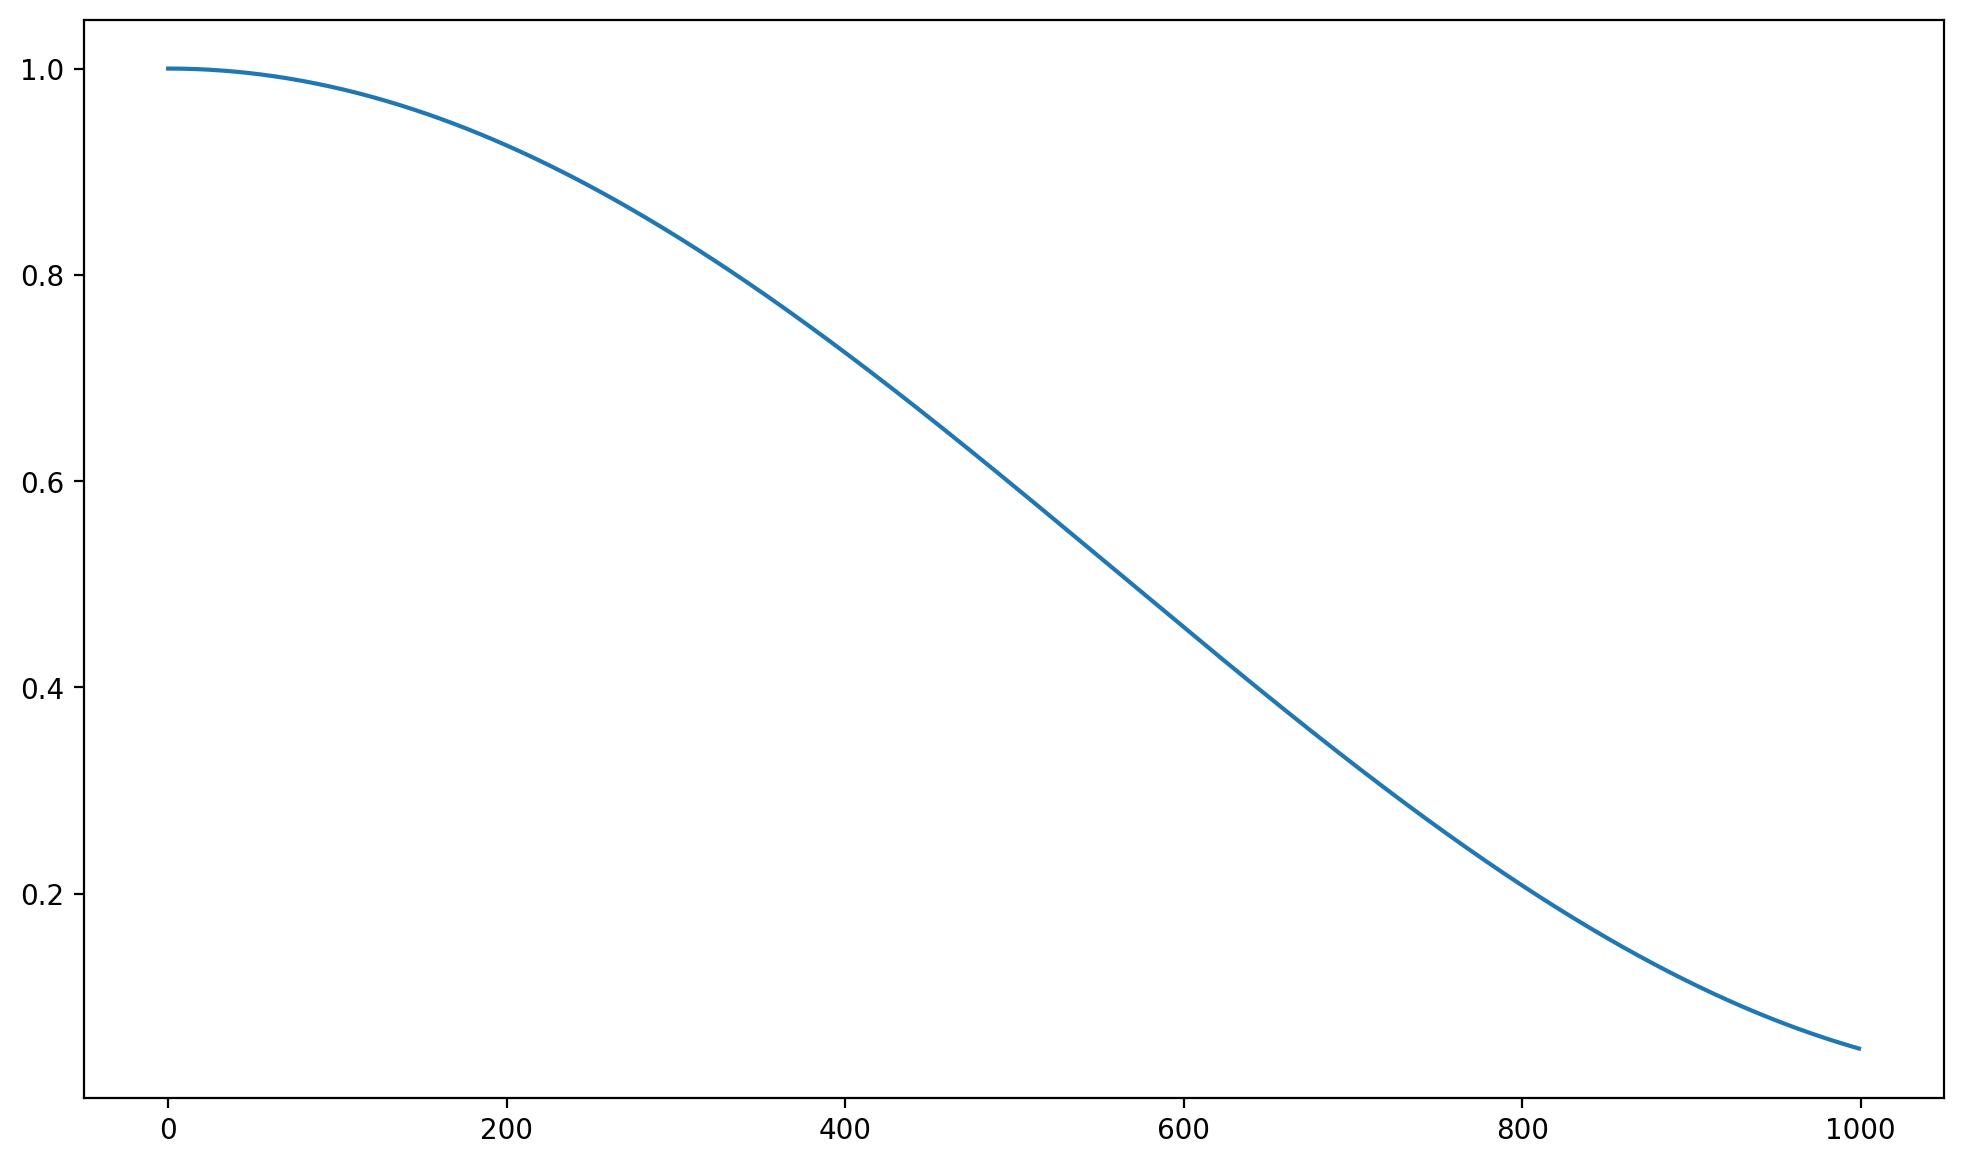

In [9]:
plt.plot(Ls, Ps)

The histogram is built based on the data given, which represents the observed number of neutrino events in each energy bin in the near detector. The x-axis of the graph corresponds to energy values, and each bin on the x-axis represents a specific energy range. The y-axis indicates the observed number of neutrino events in each corresponding energy bin. 

The Gaussian nature of the graph suggests that the distribution of neutrino events follows a pattern reminiscent of a Gaussian (normal) distribution. This type of distribution is characterized by a bell-shaped curve, where the majority of observations cluster around a central value, forming the peak of the curve. In the context of this analysis, the peak represents the energy range where the most neutrino events are observed.

The Gaussian nature of the distribution is often observed in physical systems due to the central limit theorem, which states that the sum or average of a large number of independent, identically distributed random variables tends to follow a Gaussian distribution, regardless of the original distribution of the variables.


(array([  3.,   2.,   7.,  13.,  21.,  41.,  44.,  66.,  82.,  93.,  88.,
        106., 105.,  93.,  67.,  54.,  26.,  39.,  24.,  10.,   5.,   7.]),
 array([0.875, 0.975, 1.075, 1.175, 1.275, 1.375, 1.475, 1.575, 1.675,
        1.775, 1.875, 1.975, 2.075, 2.175, 2.275, 2.375, 2.475, 2.575,
        2.675, 2.775, 2.875, 2.975, 3.075]),
 [<matplotlib.patches.Polygon at 0x7f5f244145b0>])

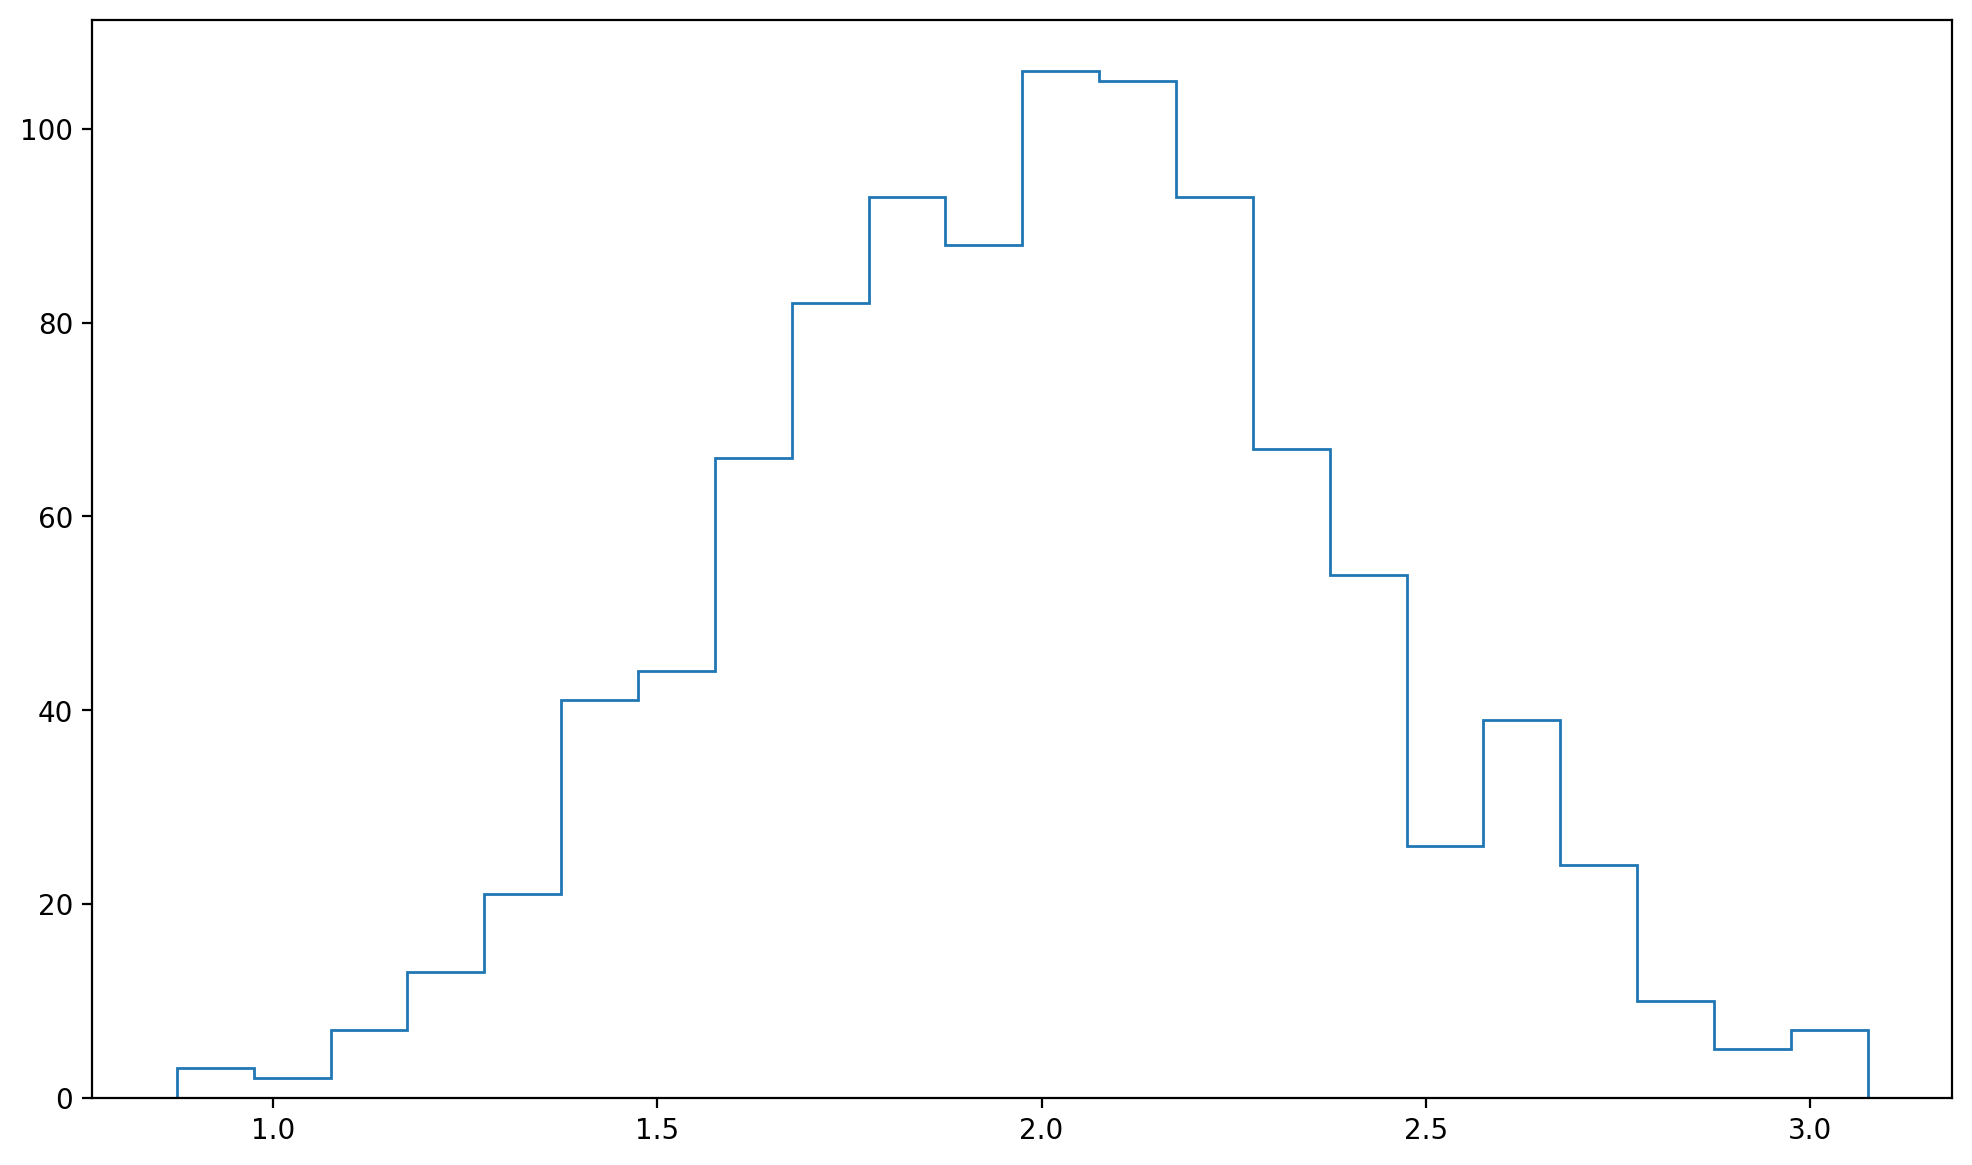

In [10]:
plt.hist(bin_edges[:-1], bin_edges, weights=counts, histtype='step')

The process of fitting a Gaussian function to the observed data set provides valuable information about the energy distribution of neutrinos at the near detector. The optimized parameters derived from this fitting convey specific characteristics of the neutrino beam:

Amplitude \(p0\): The amplitude, denoted as p0, represents the maximum height of the Gaussian curve. It signifies the peak intensity of neutrino events at the central energy. The amplitude serves as a measure of the strength of the neutrino beam at the near detector.

Peak Energy \(p1\): This parameter, optimized as p1, designates the central value of the Gaussian distribution. It signifies the energy level at which the majority of neutrino events are concentrated, offering a key insight into the dominant energy component of the beam.

Width \(p2\): The optimized p2 parameter corresponds to the standard deviation of the Gaussian distribution, representing the spread or width of the energy distribution. A larger p2 value indicates a broader energy range, reflecting a wider span of observed neutrino energies.

The optimization of these parameters through curve fitting facilitates a precise quantitative characterization of the Gaussian distribution that best fits the observed data. This refined description provides a basis for detailed analysis and interpretation of experimental outcomes in neutrino physics.



In [11]:
# Guess starting parameters
param = (100, 2, 0.5)

# Fit the Gaussian function to the observed near detector spectrum
optimised, covariance = curve_fit(gaus, bin_centers, counts, param)
print(('p0 ='), optimised[0], ('p1 ='),optimised[1], ('p2 ='),optimised[2])

p0 = 102.47053281946 p1 = 2.0004196900852973 p2 = 0.3881462193079861


The provided plot demonstrates the fitting of a Gaussian function to the observed data set, representing the energy distribution of neutrino events in the near detector. The histogram, derived from the observed counts in different energy bins, is overlaid with two Gaussian curves for comparative analysis.

The orange curve, labeled "start parameters," corresponds to a Gaussian function generated using initial guess parameters \(start\_params\) – specifically, an amplitude \(peak height\) of 105, a mean \(central energy\) of 2, and a standard deviation \(width\) of 0.5. These initial parameters serve as an initial estimation of the underlying energy distribution.

The green curve, labeled "fitted parameters," represents the Gaussian function optimized through the curve fitting process. The optimization refines the parameters \(amplitude, mean, and standard deviation\) to achieve the best fit between the model and the observed data. The optimized parameters \(params\) are printed along with their covariance.

The comparison between the two curves visually illustrates the improvement achieved by the curve fitting algorithm. The "fitted parameters" curve aligns more closely with the observed data, which indicates that the optimization process has successfully adjusted the Gaussian function to better represent the true energy distribution of neutrino events in the near detector. As can be observed, the fitted parameters by using the Gaussian function alligns more closely with the Histogram than the initial guess.



[102.47053282   2.00041969   0.38814622] [[ 9.08550520e+00 -1.98438718e-05 -2.30702618e-02]
 [-1.98438718e-05  1.73598079e-04  1.72924212e-07]
 [-2.30702618e-02  1.72924212e-07  1.74953754e-04]]


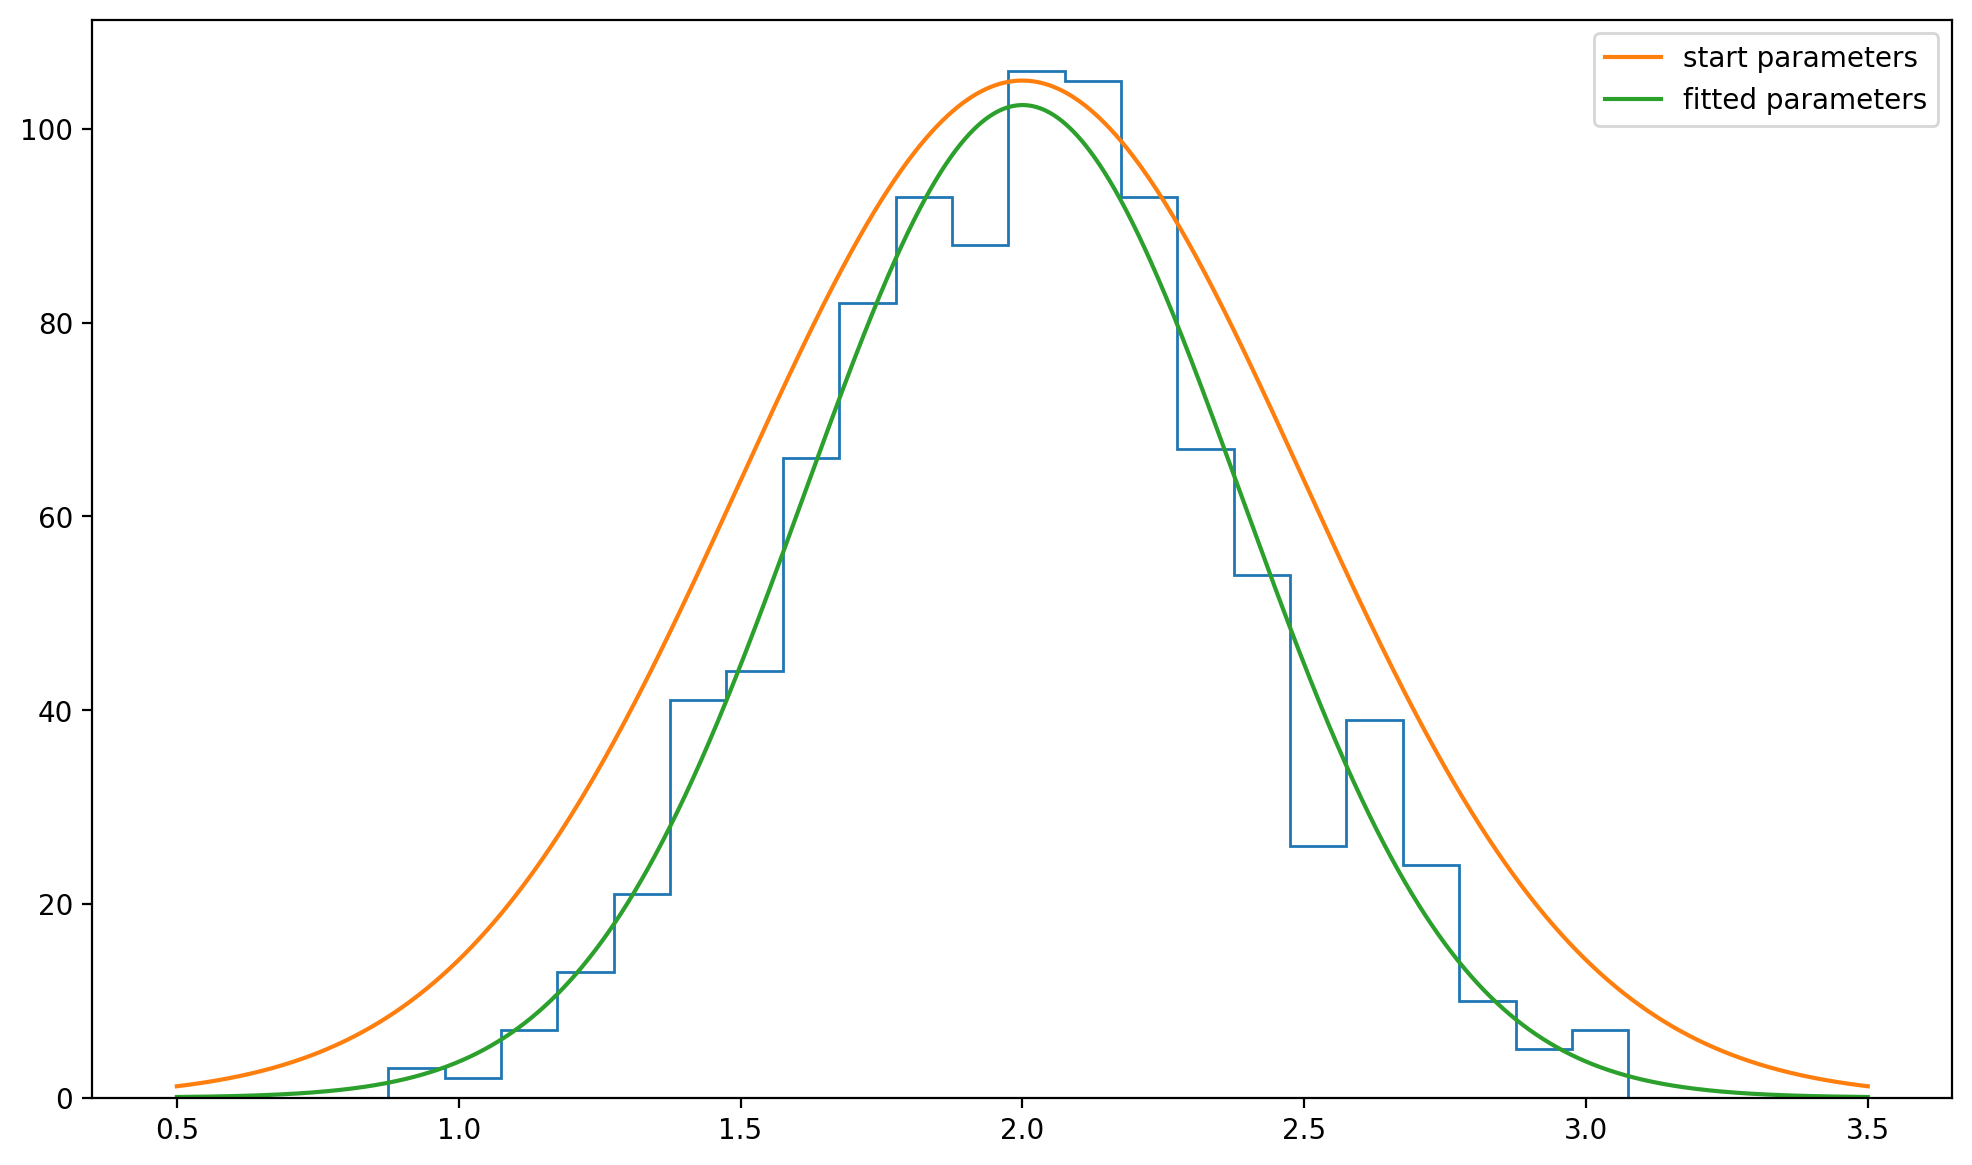

In [12]:
start_params = (105, 2, 0.5)
params, cov = curve_fit(gaus, bin_centers, counts, param)
print(params, cov)

# check that the fitted parameters are reasonable
plt.hist(bin_edges[:-1],bin_edges,weights=counts,histtype='step')
xs = np.linspace(0.5,3.5, 5000).tolist()
gausvaluestartpar = [gaus(i,start_params[0],start_params[1],start_params[2]) for i in xs]
gausvaluesfittedpar = [gaus(i,params[0],params[1],params[2]) for i in xs]
plt.plot(xs,gausvaluestartpar,label="start parameters")
plt.plot(xs,gausvaluesfittedpar, label="fitted parameters")
plt.legend()

The chi\-squared test provides a quantitative evaluation of the accuracy of the fitted Gaussian model. The value of 1.0820327864699812 for the chi\-squared per degree of freedom \(χ²/ndof\) suggests a reasonable agreement between the fitted Gaussian model and the observed data. A value close to 1 generally indicates good alignment. However, several factors should be considered in evaluating the reliability of this result.

Statistical fluctuations coming from a limited number of observations may influence the result of chi\-squared value. Additionally, systematic errors, such as uncertainties in detector calibration or variations in experimental conditions could contribute to deviations as well. The model's assumptions, particularly the reliance on a Gaussian distribution, may cause discrepencies if the true distribution has unaccounted features.

The limited number of data points might impact the precision of the fit, and increasing the dataset size could enhance reliability. The sensitivity of the model's parameters and potential measurement uncertainties, including energy calibration errors and neutrino flux determinations, should be also taken into the account.



In [13]:
epsilon = 0.0005
preds = gaus(bin_centers, params[0], params[1], params[2])
chi2 = chi2_test(counts, preds)
ndof = len(bin_centers)
print(chi2/ndof)

1.0820327864699812


### 2. The Far Detector Spectrum for Different Neutrino Oscillation Parameters



The two graphs depict the comparison between the unoscillated neutrino spectrum in the far detector \(FD\) and the observed spectrum in the near detector \(ND\). In the context of this simulation, it is assumed that, in the absence of neutrino oscillations, the near and far detector spectra would be identical, with the differences arising only from Poisson fluctuations.

The "FD unoscillated" histogram represents the predicted distribution of neutrino events at the far detector based on the fitted Gaussian spectrum. The Gaussian function is used to model the central values of the FD unoscillated spectrum, and then Poisson fluctuations are applied to simulate realistic counting uncertainties. This fluctuated spectrum accounts for the statistical nature of particle detection.

The "ND" histogram illustrates the observed spectrum in the near detector, serving as a reference for comparison. In the absence of oscillations, the assumption is that the ND and FD spectra would align, except for random Poisson fluctuations inherent in particle counting.

The overlaid histograms allow for a visual assessment of how neutrino oscillations may influence the observed spectrum at the far detector compared to the predicted unoscillated scenario. The normalization of counts ensures a meaningful comparison of the shapes of the two distributions, and the plots share the same energy axis, facilitating a direct visual comparison. In this case, the two graphs allign closely with each other, which represents the Gaussian nature of the phenomenon.



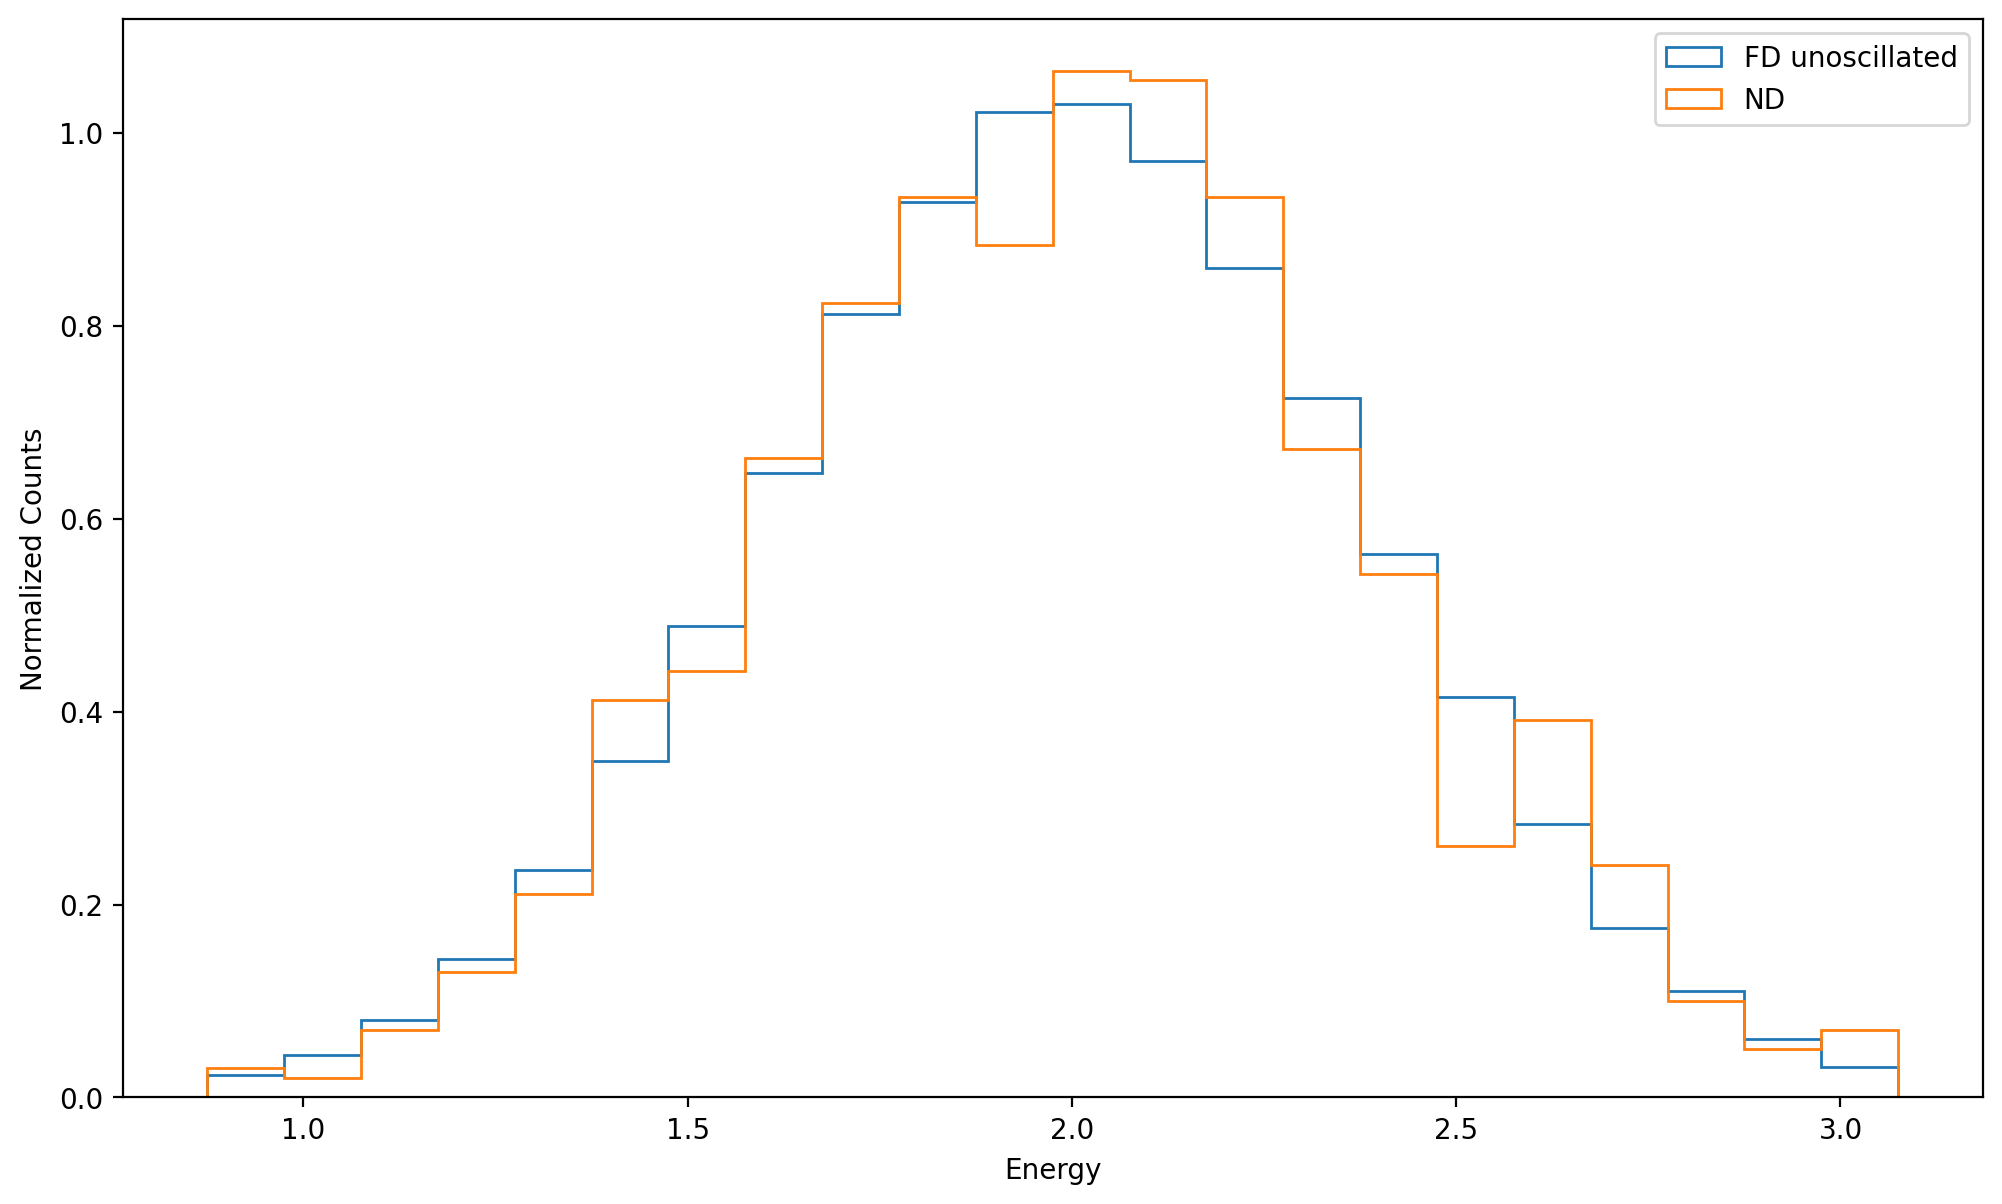

In [14]:
# Generate a histogram of the ND and FD unoscillated spectrum and plot
plt.hist(xs, bin_edges, weights=poisson, histtype='step', label="FD unoscillated", density=True)
plt.hist(bin_edges[:-1], bin_edges, weights=counts, histtype='step', label="ND", density=True)

plt.xlabel('Energy')
plt.ylabel('Normalized Counts')
plt.legend()

# Show the plot
plt.show()

This code generates histograms for the observed neutrino spectrum in the near detector \(ND\) and the predicted oscillated spectrum in the far detector \(FD\). Each histogram represents the distribution of neutrino events across various energy bins.

The "FD oscillated" histogram portrays the anticipated oscillated neutrino spectrum at the far detector. This prediction is computed by applying the oscillation probability function, accounting for parameters like the mass squared difference and mixing angle. Poisson fluctuations are introduced to emulate uncertainties associated with far detector measurements.

By presenting both histograms on the same plot, the code facilitates a visual comparison between the observed and predicted oscillated neutrino spectra. This comparative analysis enables researchers to examine how neutrino oscillations influence the energy distribution of neutrinos during their journey from the source to the far detector, yielding valuable insights into the fundamental physics of neutrino oscillations.



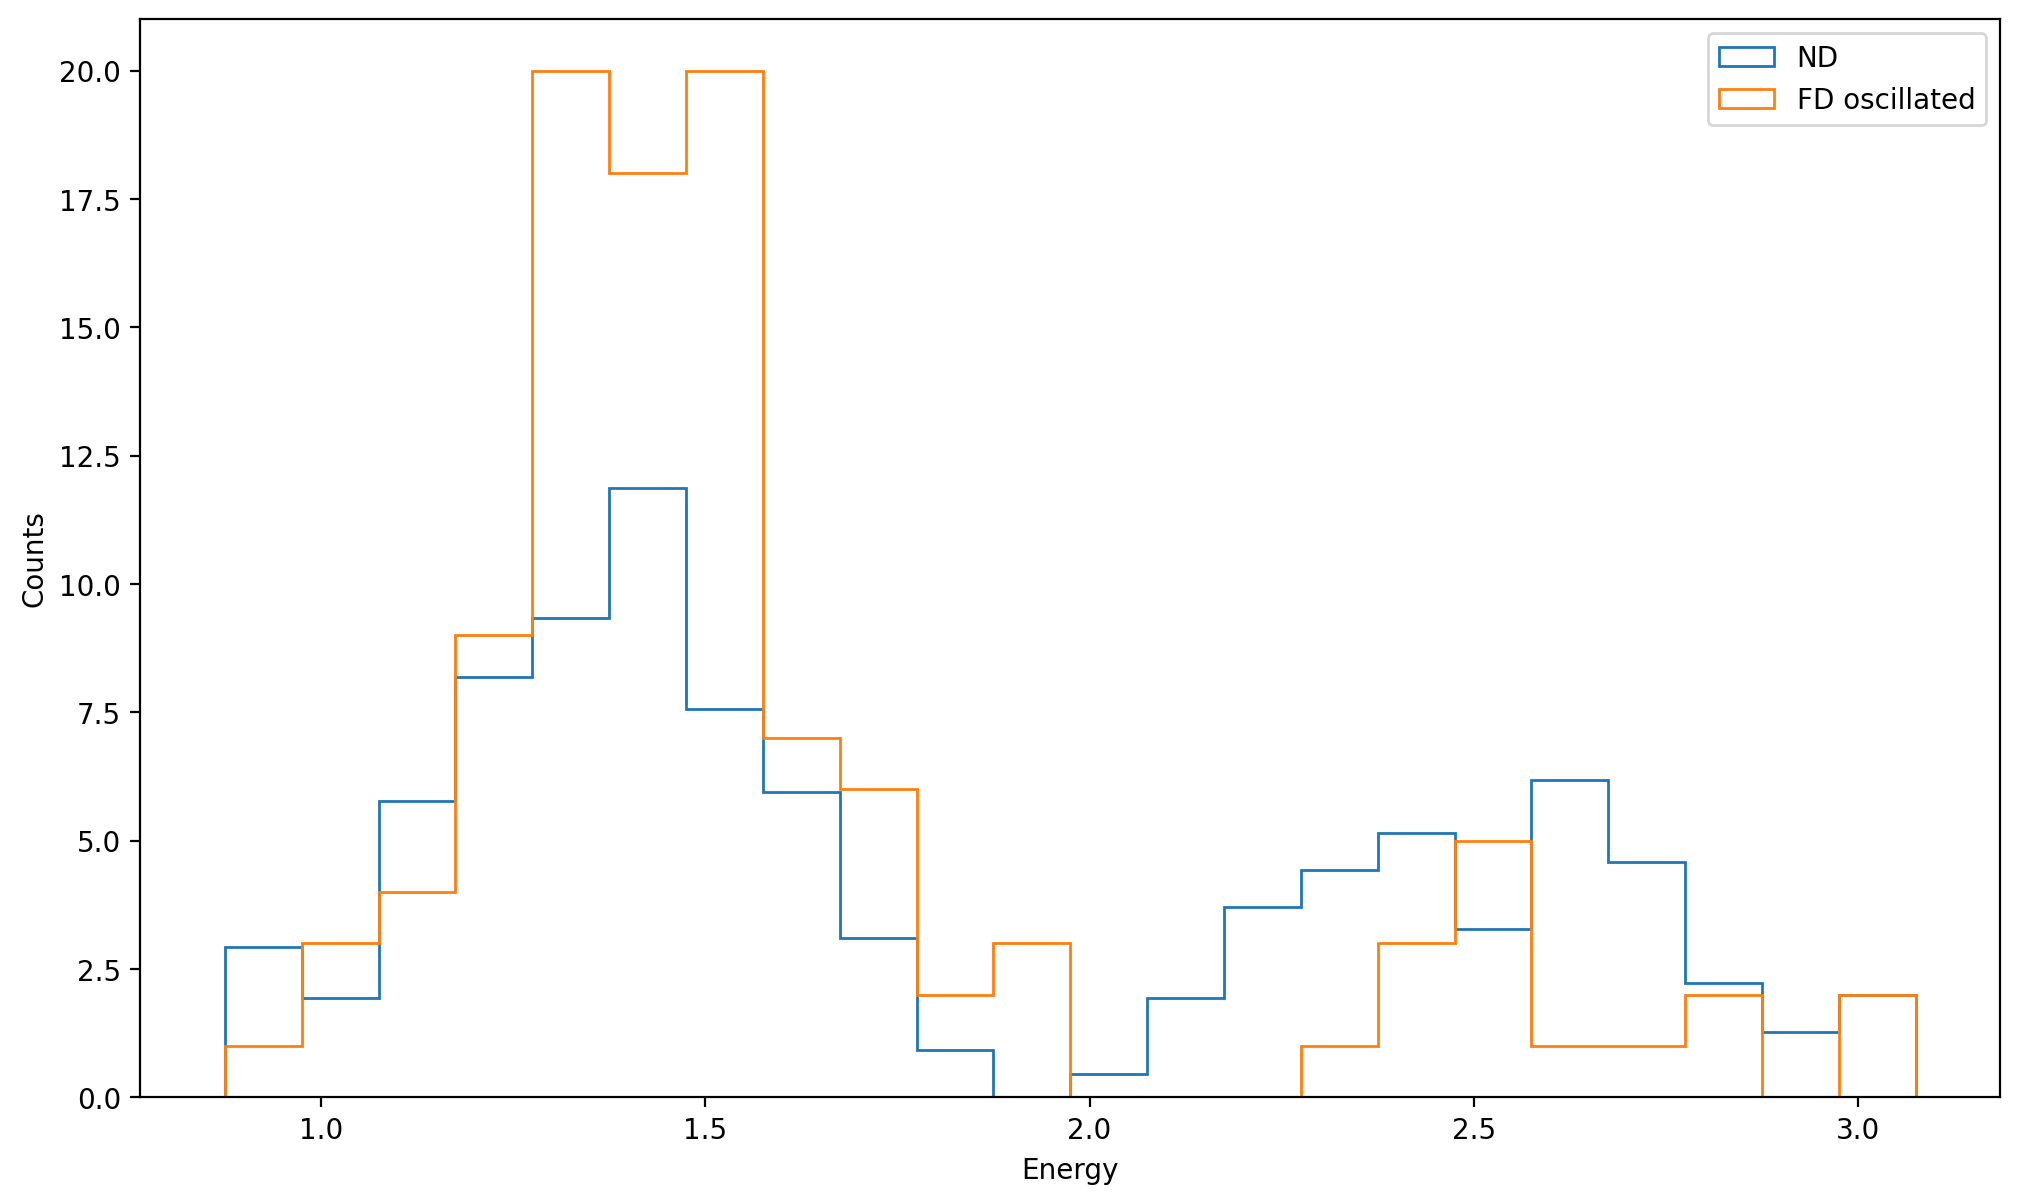

In [15]:
# Plot histograms
plt.hist(bin_edges[:-1], bin_edges, weights=new_counts, histtype='step', label="ND")
plt.hist(bin_edges[:-1], bin_edges, weights=FD_osc, histtype='step', label="FD oscillated")

# Add legend and labels
plt.legend()
plt.xlabel('Energy')
plt.ylabel('Counts')

# Show the plot
plt.show()

### 3. Fit the Far Detector Neutrino Spectrum

The results obtained from the provided code offer valuable insights into the phenomenon of neutrino oscillations. Here's a discussion of the key findings:

The initial guess parameters, representing $\Delta m^{2}$ and $\sin^{2}(2\theta)$, are essential starting points for the optimization process. The initial model prediction, printed for reference, provides a baseline expectation based on these initial assumptions.

Following the `curve_fit` optimization, the obtained parameters (`optim`) represent the best-fit values that minimize the difference between the predicted and observed far detector counts. These optimized parameters are crucial in refining our understanding of the oscillation behavior.

The histograms presented in the code visually compare different aspects of the analysis:

- **FD counts:** The observed far detector counts, reflecting the actual experimental data.
- **FD Best Fit:** The counts predicted by the model with the optimized parameters, showcasing how well the model aligns with the observed data.
- **FD Best Fit Fluctuated:** The fluctuated version of the best-fit counts, considering Poisson fluctuations, providing a more realistic representation of potential experimental uncertainties.

This analysis contributes to the understanding of neutrino oscillations by refining the parameters that govern the oscillation probability. The optimized values for $\Delta m^{2}$ and $\sin^{2}(2\theta)$ provide a more accurate representation of the oscillatory behavior in the context of the experimental conditions. Overall, these results enhance our ability to model and interpret neutrino oscillations, furthering our comprehension of fundamental particle physics.



[0.00259085 0.99918752]


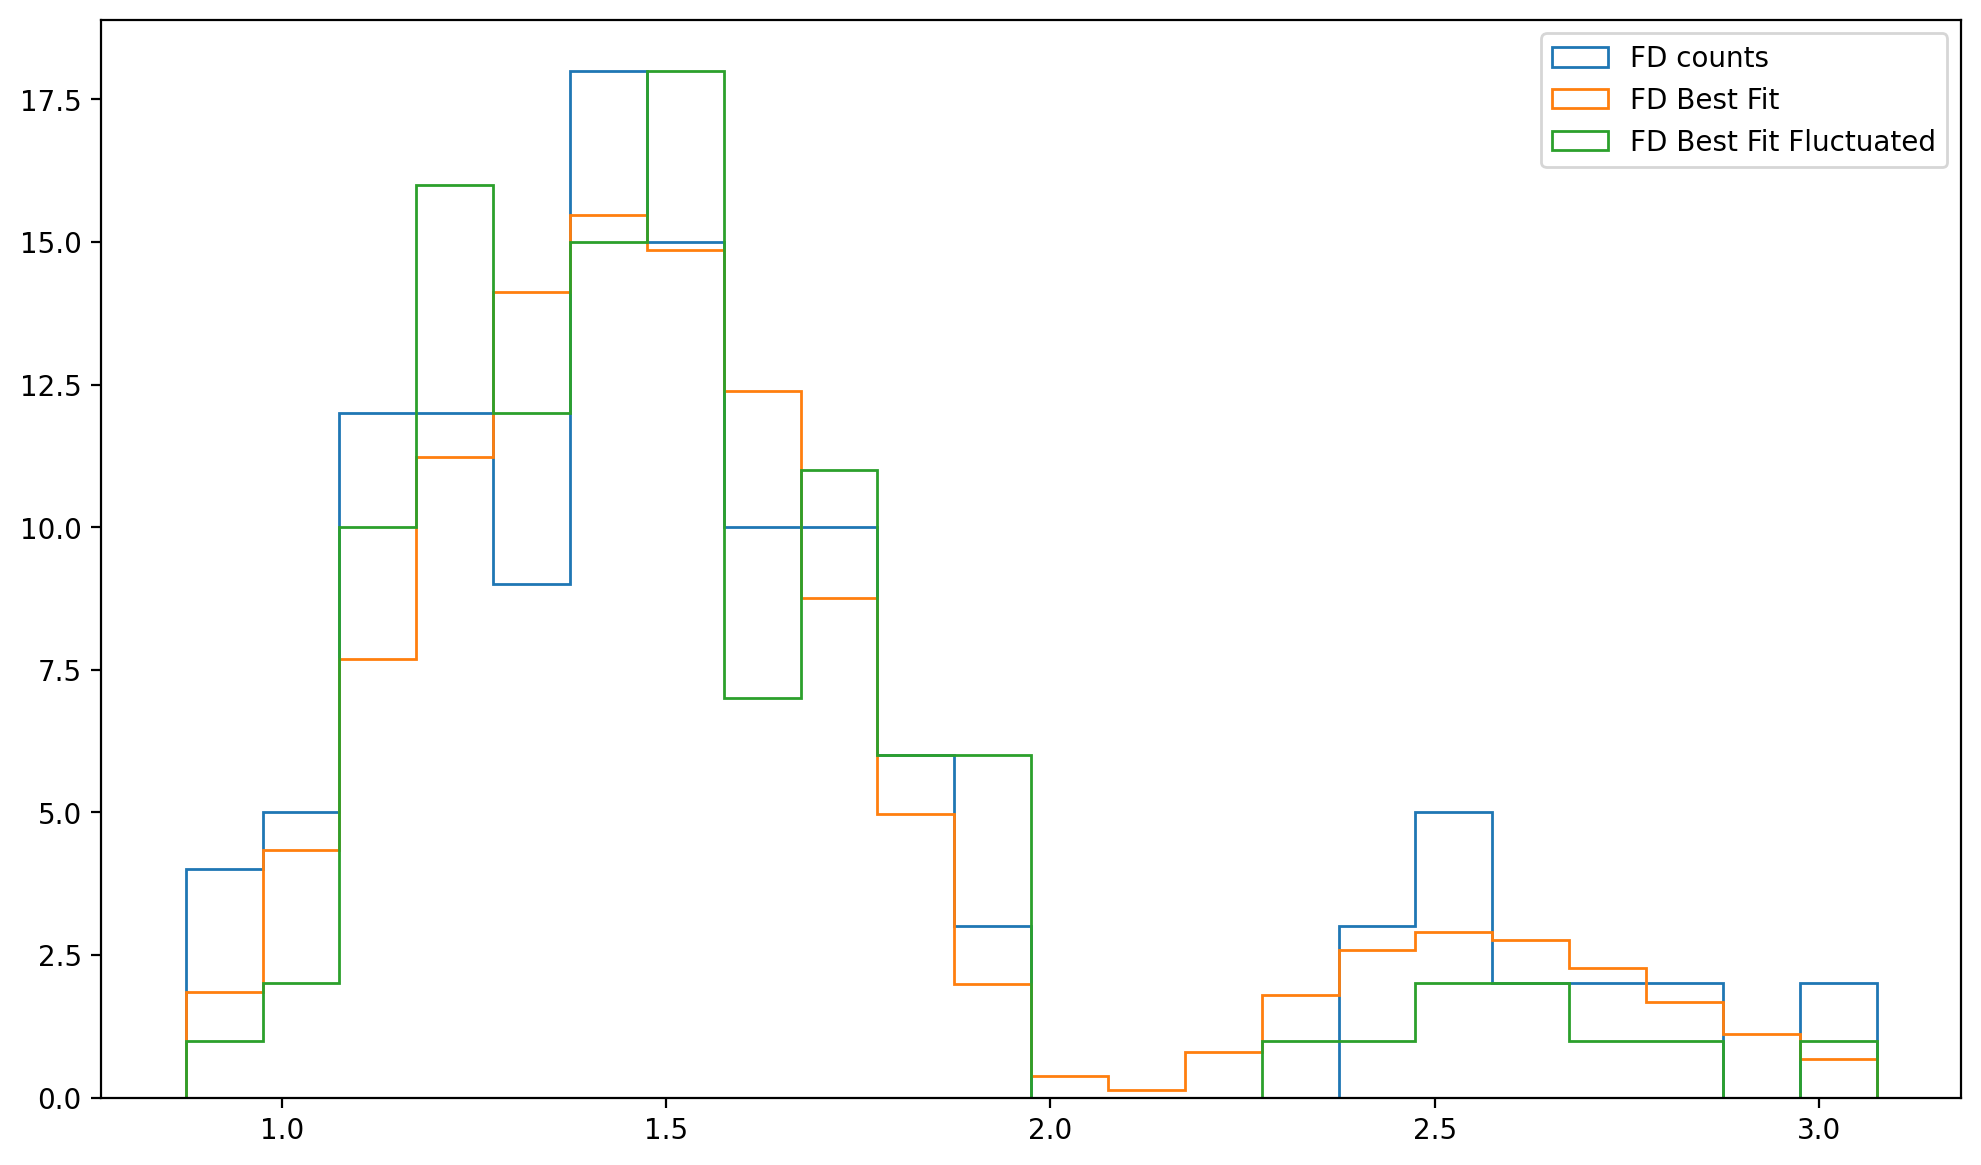

In [16]:
#Guess starting params
startguess = (2.2e-3, 0.98)

optim, covar = curve_fit(f, bin_centers, FD_counts, startguess)
print(optim)
guess_sin, guess_deltam = optim

FD_osc = np.random.poisson(f(E,guess_sin, guess_deltam))

# Plot histograms
plt.hist(bin_edges[:-1], bin_edges, weights=FD_counts, histtype='step', label="FD counts")
plt.hist(bin_edges[:-1], bin_edges, weights=f(bin_centers, optim[0], optim[1]), histtype='step', label="FD Best Fit")
plt.hist(bin_edges[:-1], bin_edges, weights=FD_osc, histtype='step', label="FD Best Fit Fluctuated")

plt.legend()
plt.show()

The provided code calculates the final chi\-squared value \(\`final\_chi2\`\) for the fitted model by comparing the observed far detector counts \(\`FD\_counts\`\) with the predicted counts based on the combined Gaussian and oscillation probability function.

The final chi\-squared value serves as a quantitative measure of how well the model, including both the Gaussian shape and neutrino oscillation effects, fits the experimental data. A lower normalized chi\-squared value suggests a better agreement between the model and the observed counts, indicating a more accurate representation of neutrino oscillations.

A value close to 1 indicates a reasonable fit between the model and data, suggesting that the chosen parameters \(sin^2\(2θ\) and Δm^2\) provide a good description of the neutrino oscillation effects.



In [17]:
final_chi2 = chi2_test(FD_counts, f(bin_centers, optim[0], optim[1]))
print(final_chi2 / ndof)

0.7892725668210812


# Discussion

## Efficiency Assessment:

Efficiency is underscored by the inclusion of Poisson fluctuations in simulating the far detector spectrum. Poisson fluctuations represent the stochastic nature of particle detection, approximating the model to the real\-world behavior of neutrino and contributing to a more accurate portrayal of experimental conditions.

The integration of the chi\-squared test stands out as a key strength. This statistical tool is a method for quantifying the agreement between the model and observed data. The efficiency of the code in analyzing complex datasets is evident through the application of the chi\-squared test to assess the goodness of fit.

## Analysis of the Code Efficiency

The provided code was designed to be efficient in modeling neutrino oscillations and analyzing experimental data, with it being easy to read and replicate. Leveraging Python libraries like NumPy, Matplotlib, and SciPy,the code employs functions like curve\_fit from scipy.optimize for optimized parameter fitting, which alligns with best practices in data analysis. It was written without any repetitions for the sake of clarity and ability to easily replicate it for further research purposes. 

1. Poisson Fluctuations:

The inclusion of Poisson fluctuations in simulating the far detector spectrum is a notable strength. This consideration acknowledges the stochastic nature of particle detection, adding a layer of realism to the model and contributing to more accurate results.

2. Chi-Squared Test:

The integration of the chi-squared test is a key highlight, providing a statistical measure to assess the goodness of fit between the model and observed data. This methodological choice enhances the code's efficiency in evaluating the accuracy of the model, particularly in the context of complex datasets.

3. Versatile Libraries:

The utilization of versatile scientific libraries, such as NumPy for numerical operations and Matplotlib for data visualization, underscores the code's efficiency. These libraries provide a solid foundation for scientific computing and facilitate seamless integration into the broader scientific community.

## Areas for the Experiment Improvement:

1. Systematic Uncertainties:

The code should comprehensively address systematic uncertainties beyond statistical considerations. Factors such as experimental setup, energy calibration, and resolution should be systematically analyzed and incorporated into the modeling, enhancing the code's accuracy.

2. Energy Calibration and Resolution:

Improvements could be made by addressing energy calibration and resolution nuances. A more detailed consideration, including uncertainties, is crucial for refining energy spectrum modeling. Investigating the impact of energy-related uncertainties on oscillation parameters contributes to a more robust analysis.

3. Baseline Variations:

The assumption of a constant baseline in the neutrino oscillation probability function may oversimplify physics. The code's accuracy would benefit from an exploration of variations in the baseline, recognizing that experimental setups might entail more intricate geometries. A sensitivity analysis regarding baseline variations would provide more detailed insights.

4. Modeling Detector Response:

Enhancing the accuracy of the code involves a more sophisticated treatment of the detector response. Detailed modeling of detector characteristics, such as response functions and efficiency, would contribute to a truthful representation of experimental outcomes.

5. Additional Analysis:

While the current focus is on neutrino oscillations, the code's depth could be expanded by considering additional analyses. Exploring different oscillation scenarios or investigating sensitivity to variations in input parameters enriches the scientific interpretation.



# Conclusion 

In conclusion, this research employs a computational framework to investigate neutrino oscillations, aiming to explain the relationship between neutrino behavior and oscillation parameters. The utilization of Python libraries and scientific methods like curve fitting and application of Poisson fluctuations has approximated the real\-world behaviour of neutrino.

The neutrino survival probability, described by the function $P_{\nu_{\mu} \rightarrow \nu_{\mu}}(L, E, \Delta m^2, \sin^2 2\theta)$, serves as a foundation for understanding the oscillatory behavior of muon neutrinos. The sinusoidal pattern observed in the survival probability function, governed by the mass squared difference \($\Delta m^2$\) and the mixing angle \($\theta$\), describes the behaviour of neutrino oscillations. The research described how parameters affect the oscillatory behavior through the data analysis, showing the relationship between neutrino oscillations and distance, energy, and mass squared difference and flavour mixing angle.

The fitting of a Gaussian function to the experimental data is a crucial aspect of the research. The Gaussian fit functions as a mathematical representation of the neutrino beam's energy distribution, capturing essential characteristics such as peak energy, width, and height. The synergy between the Gaussian function and the neutrino oscillation probability function allows for a quantitative description of the observed dataset, facilitating a deeper comprehension of the neutrino beam's characteristics.

Additionally, the incorporation of Poisson fluctuations in simulating far detector spectra introduces stochastic considerations, acknowledging the inherent uncertainties associated with particle detection. This consideration aligns the model more closely with the statistical nature of the experiment.

The chi\-squared test emerges as a tool for assessing the goodness of fit between the model and observed data. It provides a quantitative measure of the model's performance, guiding the iterative optimization of parameters. The minimization of the chi\-squared value indicates the commitment to achieving reasonable alignment between the model and empirical observations. The Chi values of 1.08 and 0.79 for the near and far detectors respectively turned out to be close to 1, indicating that the fit of the predicted to the actual data is reasonably accurate.

While the code effectively addresses statistical uncertainties and simulates realistic experimental conditions, there remain opportunities for refinement. Systematic uncertainties, energy calibration, and detector response considerations could be further explored to enhance the accuracy and fidelity of the model.

